In [1]:
import numpy as np
import logistic_regression
import os
import h5py
import matplotlib.pyplot as plt

# Loading Dataset


In [2]:
path = os.path.join(os.getcwd(), 'data','train_catvnoncat.h5')
    
train_dataset = h5py.File(path, "r")
train_set_original = train_dataset['train_set_x'][:]
train_set_label = train_dataset['train_set_y'][:]
train_y = train_set_label.reshape((1, train_set_label.shape[0]))
    
path = os.path.join(os.getcwd(),  'data','test_catvnoncat.h5')

test_dataset = h5py.File(path, 'r')
test_set_original = test_dataset['test_set_x'][:]
test_set_label = test_dataset['test_set_y'][:]
test_y = test_set_label.reshape((1, test_set_label.shape[0]))

list_classes = test_dataset['list_classes'][:]

## Plotting Data

y = 0 and class = non-cat


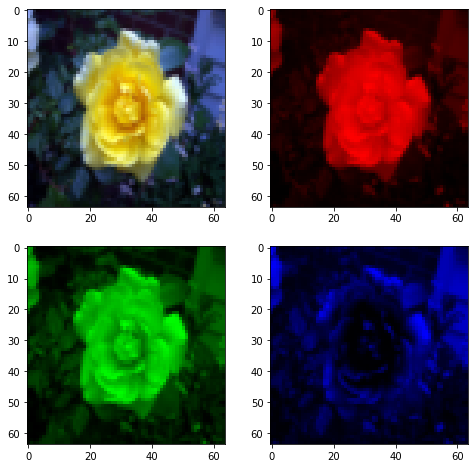

In [3]:
index = 34
fig, ax = plt.subplots(2, 2,figsize = (8,8))

print(f"y = {np.squeeze(train_y[:, index])} and class = {list_classes[np.squeeze(train_y[:, index])].decode('utf-8')}")

test_r = train_set_original[index].copy()
test_b = train_set_original[index].copy()
test_g = train_set_original[index].copy()

test_r[:,:,1] = 0
test_r[:,:,2] = 0

test_b[:,:,0] = 0
test_b[:,:,2] = 0

test_g[:,:,0] = 0
test_g[:,:,1] = 0

ax[0][0].imshow(train_set_original[index])
ax[0][1].imshow(test_r)
ax[1][0].imshow(test_b)
ax[1][1].imshow(test_g)


# Pre Processing Data

In [4]:
train_set_flatten = train_set_original.reshape(train_set_original.shape[0], -1).T
test_set_flatten = test_set_original.reshape(test_set_original.shape[0], -1).T

train_x = train_set_flatten / 255.
test_x = test_set_flatten / 255.

n_x = train_x.shape[0] + 1

m_train = train_x.shape[1]
m_test = test_x.shape[1]

print(f"Number of Feature : {n_x} and Number of Example : {m_train}")

train_x = np.vstack((np.ones((1, m_train)), train_x))
test_x = np.vstack((np.ones((1, m_test)), test_x))


Number of Feature : 12289 and Number of Example : 209


#  Model

In [9]:
def model(train_x, train_y, test_x, test_y, num_iteration = 2000, alpha = 0.005, print_cost = False ):
    theta = np.zeros((n_x , 1))

    theta , costs = logistic_regression.forward_propagation(theta, train_x, train_y, alpha, num_iteration, print_cost)

    y_train_pred = logistic_regression.predict(theta, train_x)
    y_test_pred = logistic_regression.predict(theta, test_x)

    print(f"Training Accuracy : { 100 - np.mean(np.abs(y_train_pred - train_y)) * 100}")
    print(f"Testing Accuracy : {100 - np.mean(np.abs(y_test_pred - test_y)) * 100}")

    parameter = {'costs': costs,
                 'theta': theta,
                 'y_train_pred': y_train_pred,
                 'y_test_pred': y_test_pred,
                 'alpha': alpha,
                 'num_iteration': num_iteration}

    return parameter

In [21]:
parameter = model(train_x, train_y, test_x, test_y, print_cost= True, alpha = 0.005)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Training Accuracy : 99.04306220095694
Testing Accuracy : 70.0


# Cost vs Iteration

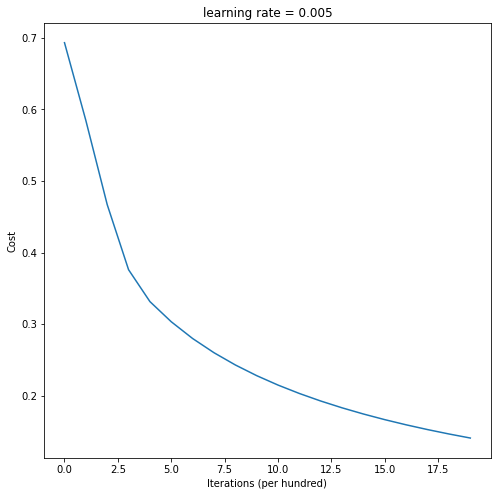

In [22]:
fig, axis = plt.subplots(1,1,figsize = (8,8))
costs = np.squeeze(parameter['costs'])
axis.plot(costs)
plt.xlabel("Iterations (per hundred)")
plt.ylabel("Cost")
plt.title(f"learning rate = {parameter['alpha']}")
plt.show()
